In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_excel('claims-data-2015-as-of-feb-9-2016.xlsx')
data.head()

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2015060222904,2015-05-28,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
1,2015082725115,2015-08-21,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2,2015102326219,2015-10-07,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
3,2015122027695,2015-10-27,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,2015-01-22,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   8667 non-null   int64         
 1   Date Received  8667 non-null   datetime64[ns]
 2   Incident D     8667 non-null   datetime64[ns]
 3   Airport Code   8667 non-null   object        
 4   Airport Name   8667 non-null   object        
 5   Airline Name   8667 non-null   object        
 6   Claim Type     8667 non-null   object        
 7   Claim Site     8667 non-null   object        
 8   Item Category  8667 non-null   object        
 9   Close Amount   8667 non-null   object        
 10  Disposition    8667 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 744.9+ KB


In [118]:
data.columns

Index(['Claim Number', 'Date Received', 'Incident D', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site',
       'Item Category', 'Close Amount', 'Disposition'],
      dtype='object')

In [119]:
data['Claim Type'].value_counts()

Claim Type
Passenger Property Loss    4551
Property Damage            3888
Personal Injury             122
Motor Vehicle                35
-                            34
Complaint                    28
Employee Loss (MPCECA)        9
Name: count, dtype: int64

In [120]:
data['Claim Site'].value_counts()

Claim Site
Checked Baggage    6261
Checkpoint         2293
Motor Vehicle        49
-                    39
Other                24
Bus Station           1
Name: count, dtype: int64

In [121]:
data[data['Claim Site'] == 'Bus Station']

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
2753,2015020220325,2015-02-02,2014-12-26,GRR,Gerald R. Ford International Airport,Allegiant Air,Property Damage,Bus Station,Baggage/Cases/Purses; Other; Other,-,-


<Axes: xlabel='Disposition'>

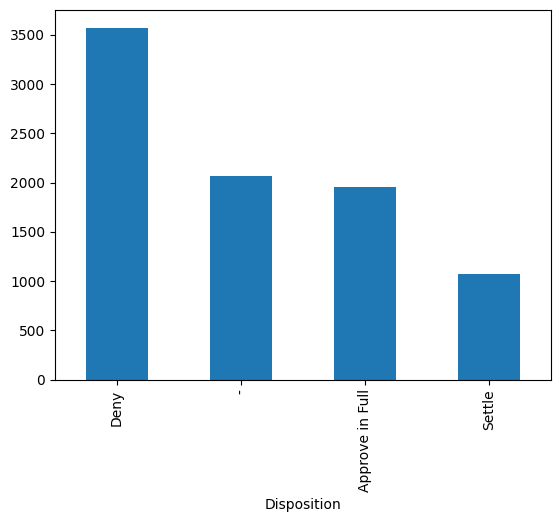

In [122]:
data['Disposition'].value_counts().plot(kind='bar')

In [123]:
missingdisp = pd.DataFrame(
    data= [
        data.loc[data['Disposition'] == '-', 'Airport Code'].value_counts(), 
        data['Airport Code'].value_counts()
    ],
    index=['Missing Disp', 'Total']
).T.fillna(0)

missingdisp

,Missing Disp,Total
Airport Code,,
LAX,142.0,495.0
JFK,132.0,523.0
ATL,122.0,362.0
MCO,81.0,372.0
ORD,80.0,261.0
...,...,...
GTF,0.0,1.0
CMX,0.0,1.0
COD,0.0,1.0


In [124]:
mask = missingdisp['Total'] > 50
(missingdisp.loc[mask, 'Missing Disp'] / missingdisp.loc[mask, 'Total']).sort_values(ascending=False)

Airport Code
-      1.000000
SJU    0.373134
SLC    0.361111
ATL    0.337017
ORD    0.306513
F      0.288660
LAX    0.286869
DFW    0.286486
PHX    0.277551
STL    0.274510
LGA    0.273438
IAD    0.272189
MDW    0.264706
CLT    0.259259
JFK    0.252390
AUS    0.250000
MIA    0.248366
MSY    0.243243
BNA    0.241379
IAH    0.239264
DAL    0.238806
RDU    0.238095
HOU    0.238095
MCO    0.217742
DTW    0.217391
DCA    0.215054
PHL    0.213018
SNA    0.206897
FLL    0.203593
SMF    0.186441
TPA    0.173469
MSP    0.170455
LAS    0.164062
BOS    0.160550
EWR    0.157051
HNL    0.155738
DEN    0.149171
OAK    0.134146
SEA    0.131148
SAN    0.126984
PDX    0.126582
CLE    0.111111
BWI    0.093220
RSW    0.092593
dtype: float64

In [125]:
data['Airport Code'].value_counts()

Airport Code
JFK    523
LAX    495
MCO    372
ATL    362
EWR    312
      ... 
CMX      1
COD      1
RHI      1
CRW      1
DIK      1
Name: count, Length: 301, dtype: int64

In [126]:
data['Item Category'].value_counts()

Item Category
Baggage/Cases/Purses                                                                                                   1004
Computer & Accessories                                                                                                  736
Clothing                                                                                                                723
-                                                                                                                       663
Other                                                                                                                   570
                                                                                                                       ... 
Baggage/Cases/Purses; Clothing; Clothing; Jewelry & Watches; Other                                                        1
Baggage/Cases/Purses; Baggage/Cases/Purses; Cameras; Personal Electronics; Personal Electronics; Travel Accessories   

<Axes: ylabel='Frequency'>

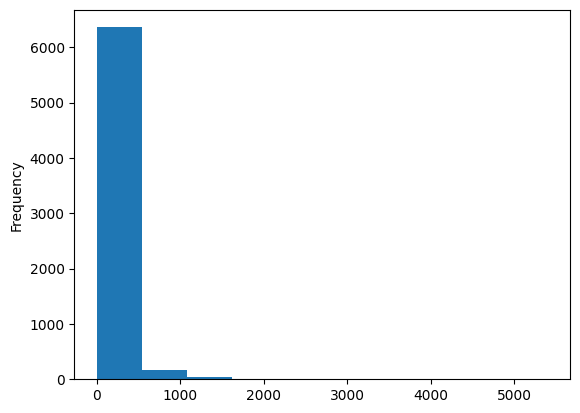

In [127]:
pd.to_numeric(data['Close Amount'], errors='coerce').plot(kind='hist')

In [128]:
data['Close Amount'] = pd.to_numeric(data['Close Amount'], errors='coerce')

In [129]:
data['Airline Name'].value_counts()

Airline Name
Southwest Airlines          1518
Delta Air Lines             1441
American Airlines           1198
UAL                         1095
USAir                        610
                            ... 
Japan Airlines                 1
Brussels Airlines              1
Middle East Airlines           1
North American Airlines        1
Allegheny Airlines Inc         1
Name: count, Length: 119, dtype: int64

In [130]:
topairlines = list(data['Airline Name'].value_counts().index[:10])
topairlines

['Southwest Airlines  ',
 'Delta Air Lines  ',
 'American Airlines  ',
 'UAL  ',
 'USAir  ',
 '-',
 'Jet Blue',
 'Alaska Airlines  ',
 'Spirit Airlines',
 'Frontier Airlines']

In [131]:
data['Airline Name'].isin(topairlines)

0       False
1        True
2       False
3       False
4        True
        ...  
8662     True
8663     True
8664     True
8665     True
8666     True
Name: Airline Name, Length: 8667, dtype: bool

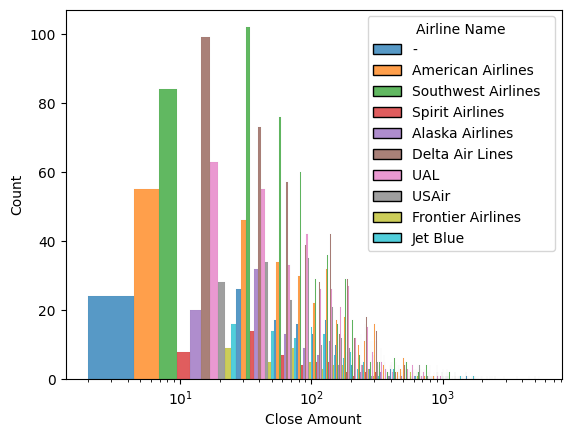

In [132]:
sns.histplot(
    data=data[(data['Airline Name'].isin(topairlines)) & (data['Close Amount'] > 0)],
    x='Close Amount',
    hue='Airline Name',
    multiple='dodge'
)

plt.xscale('log')

<Axes: xlabel='Close Amount'>

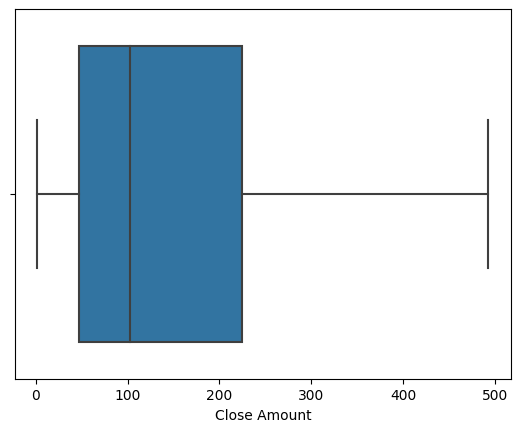

In [133]:
sns.boxplot(
    data=data[(data['Close Amount'] > 0)],
    x='Close Amount',
    showfliers=False
)

<Axes: xlabel='Close Amount', ylabel='Airline Name'>

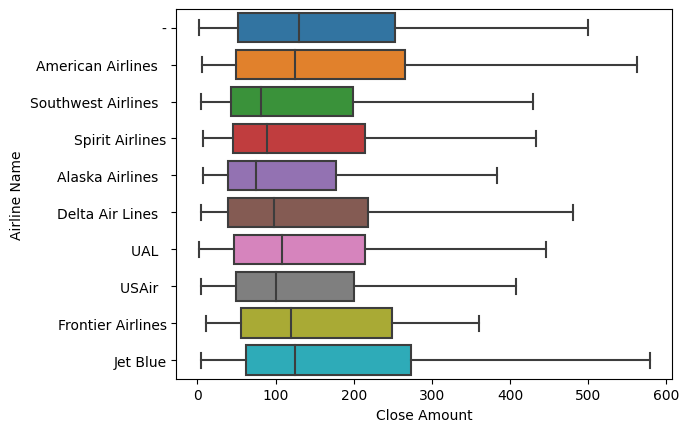

In [134]:
sns.boxplot(
    data=data[(data['Airline Name'].isin(topairlines)) & (data['Close Amount'] > 0)],
    x='Close Amount',
    showfliers=False,
    y='Airline Name'
)

In [135]:
is_top_airline = (data['Airline Name'].isin(topairlines))

by_date = (
    data[is_top_airline]
    .pivot_table(
        index='Incident D', 
        columns='Airline Name', 
        values='Claim Number', 
        aggfunc='count')
)
by_date

Airline Name,-,Alaska Airlines,American Airlines,Delta Air Lines,Frontier Airlines,Jet Blue,Southwest Airlines,Spirit Airlines,UAL,USAir
Incident D,,,,,,,,,,
2012-02-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-16,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-06-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-20,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2015-12-25,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2015-12-26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2015-12-27,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN


In [136]:
by_date.loc['2015']

Airline Name,-,Alaska Airlines,American Airlines,Delta Air Lines,Frontier Airlines,Jet Blue,Southwest Airlines,Spirit Airlines,UAL,USAir
Incident D,,,,,,,,,,
2015-01-01,NaN,3.0,5.0,8.0,NaN,2.0,4.0,NaN,3.0,NaN
2015-01-02,1.0,NaN,7.0,2.0,NaN,1.0,7.0,NaN,7.0,3.0
2015-01-03,2.0,3.0,6.0,NaN,NaN,NaN,5.0,1.0,2.0,3.0
2015-01-04,1.0,4.0,4.0,4.0,NaN,2.0,7.0,NaN,5.0,1.0
2015-01-05,2.0,1.0,2.0,3.0,NaN,2.0,5.0,NaN,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...
2015-12-25,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2015-12-26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2015-12-27,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN


<Axes: xlabel='Airline Name', ylabel='Incident D'>

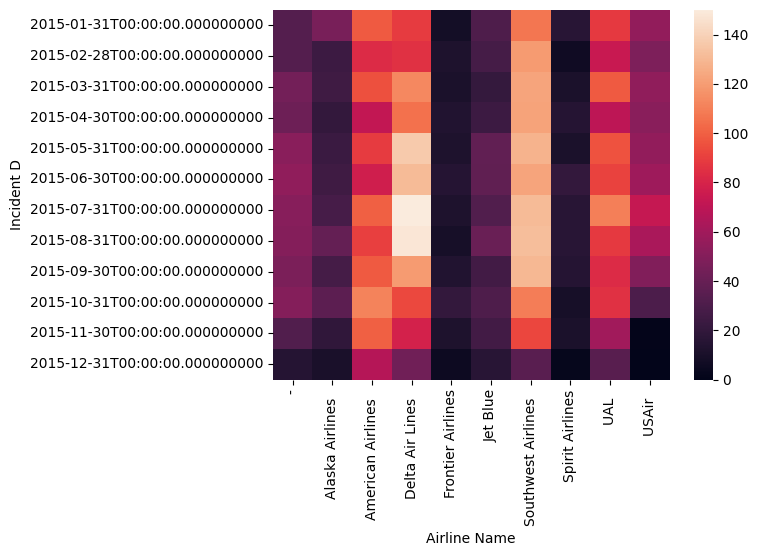

In [137]:
sns.heatmap(by_date.loc['2015'].resample('M').sum())

<Axes: xlabel='Incident D', ylabel='value'>

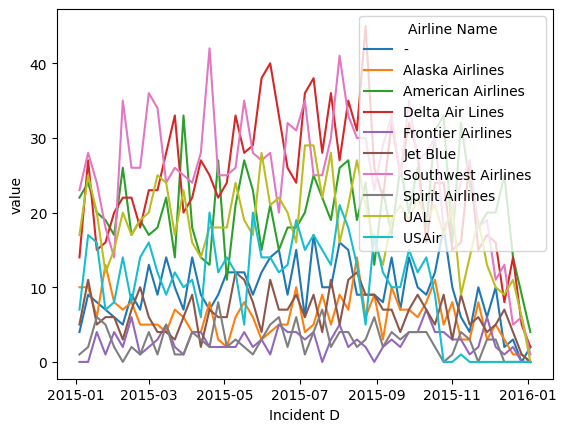

In [138]:
sns.lineplot(
    data=by_date.loc['2015'].resample('W').sum().melt(ignore_index=False).reset_index(),
    x='Incident D',
    y='value',
    hue='Airline Name'
)

<Axes: xlabel='Incident D'>

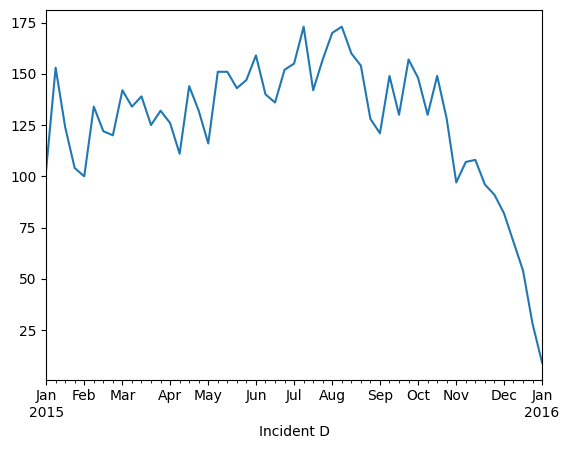

In [139]:
by_date.loc['2015'].resample('W').sum().sum(axis=1).plot(kind='line')